## Rascunho modelo de machine learning (Random Forest)

Começando com a importação do arquivo

In [1]:
import pandas as pd
import numpy as np

dados = pd.read_csv('precos_carros.csv', sep=';')

In [2]:
dados.head(5)

,modelo,combustivel,preco,ano,km,cor,cambio,cidade,airbag motorista,freios ABS,...,alarme,câmbio automático,ajuste de altura,"distribuição eletrônica de frenagem,",controle de tração,retrovisores elétricos,piloto automático,Kit Multimídia,bancos de couro,limp. traseiro
0,Fiat Mobi 1.0 Like 2021,Flex,"R$ 52.010,00",2021,58.855,Branco,0,João Pessoa,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Renault Kwid 1.0 Zen 2022,Flex,"R$ 52.170,00",2021,52.606,Prata,0,Maceió,0,1,...,0,0,0,0,0,0,0,0,0,1
2,Volkswagen Gol 1.0 2022,Flex,"R$ 52.990,00",2021,67.854,Cinza,0,Mossoró,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Fiat Mobi 1.0 Like 2022,Flex,"R$ 55.280,00",2021,54.353,Prata,0,Petrolina,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Volkswagen Gol 1.0 2022,Flex,"R$ 56.000,00",2021,46.919,Branco,0,Guarapuava,1,1,...,0,0,0,0,0,0,0,0,0,1


Resetando o index do dataframe

In [3]:
dados.reset_index(drop=True, inplace=True)

# Começando o tratamento dos dados

Removendo R$ e espaços em branco da coluna preço e transformando a coluna km
em dados do tipo 'float'

In [4]:
dados['preco'] = dados['preco'].str.replace('R$', '').str.replace('.', '').str.replace(',', '.').astype(float)
dados['km'] = dados['km'].apply(lambda x: np.nan if x == 'N/D' else float(x))


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   modelo                                2842 non-null   object 
 1   combustivel                           2842 non-null   object 
 2   preco                                 2842 non-null   float64
 3   ano                                   2842 non-null   int64  
 4   km                                    2818 non-null   float64
 5   cor                                   2842 non-null   object 
 6   cambio                                2842 non-null   int64  
 7   cidade                                2842 non-null   object 
 8   airbag motorista                      2842 non-null   int64  
 9   freios ABS                            2842 non-null   int64  
 10  airbag passageiro                     2842 non-null   int64  
 11  ar-condicionado  

In [6]:
dados.head(5)

,modelo,combustivel,preco,ano,km,cor,cambio,cidade,airbag motorista,freios ABS,...,alarme,câmbio automático,ajuste de altura,"distribuição eletrônica de frenagem,",controle de tração,retrovisores elétricos,piloto automático,Kit Multimídia,bancos de couro,limp. traseiro
0,Fiat Mobi 1.0 Like 2021,Flex,52010.0,2021,58.855,Branco,0,João Pessoa,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Renault Kwid 1.0 Zen 2022,Flex,52170.0,2021,52.606,Prata,0,Maceió,0,1,...,0,0,0,0,0,0,0,0,0,1
2,Volkswagen Gol 1.0 2022,Flex,52990.0,2021,67.854,Cinza,0,Mossoró,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Fiat Mobi 1.0 Like 2022,Flex,55280.0,2021,54.353,Prata,0,Petrolina,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Volkswagen Gol 1.0 2022,Flex,56000.0,2021,46.919,Branco,0,Guarapuava,1,1,...,0,0,0,0,0,0,0,0,0,1


## Criando uma função para criar uma coluna de motor, se o carro for 1.0 a coluna terá o valor 1000 e assim por diante

In [7]:
cilindrada = {}

for i in range(10, 41):
    valor = f'{i / 10:.1f}'
    cilindrada[valor] = int(i * 100)

def extract_cilindrada(modelo):
    for key in cilindrada.keys():
        if key in modelo:
            return key
    return None

In [8]:
dados['motor'] = dados['modelo'].apply(extract_cilindrada).map(cilindrada)

In [9]:
dados.head(5)

,modelo,combustivel,preco,ano,km,cor,cambio,cidade,airbag motorista,freios ABS,...,câmbio automático,ajuste de altura,"distribuição eletrônica de frenagem,",controle de tração,retrovisores elétricos,piloto automático,Kit Multimídia,bancos de couro,limp. traseiro,motor
0,Fiat Mobi 1.0 Like 2021,Flex,52010.0,2021,58.855,Branco,0,João Pessoa,0,1,...,0,0,0,0,0,0,0,0,0,1000.0
1,Renault Kwid 1.0 Zen 2022,Flex,52170.0,2021,52.606,Prata,0,Maceió,0,1,...,0,0,0,0,0,0,0,0,1,1000.0
2,Volkswagen Gol 1.0 2022,Flex,52990.0,2021,67.854,Cinza,0,Mossoró,1,1,...,0,0,0,0,0,0,0,0,0,1000.0
3,Fiat Mobi 1.0 Like 2022,Flex,55280.0,2021,54.353,Prata,0,Petrolina,0,1,...,0,0,0,0,0,0,0,0,0,1000.0
4,Volkswagen Gol 1.0 2022,Flex,56000.0,2021,46.919,Branco,0,Guarapuava,1,1,...,0,0,0,0,0,0,0,0,1,1000.0


## Trantando a coluna 'modelo'

Removendo do nome do modelo o motor, ano, e outros padrões

In [10]:
import re

def remove_motor_ano_nome(texto):
    motor = r'\d+\.\d+'
    ano = r'\b\d{4}\b'
    nome = r'\(.+\)'
    padroes_adicionais = r'\s?2p|\s?4p|\s?2P|\s?4P|\s?8V|\s?12v|\s?12V|\s?16V|\s?20V'

    texto = re.sub(motor, '', texto)
    texto = re.sub(ano, '', texto)
    texto = re.sub(nome, '', texto)
    texto = re.sub(padroes_adicionais, '', texto)

    return texto.strip()

dados['modelo'] = dados['modelo'].apply(remove_motor_ano_nome)

In [11]:
dados['modelo'].unique()

array(['Fiat Mobi  Like', 'Renault Kwid  Zen', 'Volkswagen Gol',
       'Fiat Grand Siena', 'Volkswagen Voyage  MSI',
       'Hyundai HB20  Sense', 'Hyundai HB20  Vision', 'Fiat Argo  Drive',
       'Hyundai HB20  Evolution', 'Chevrolet Onix Plus  LT',
       'Peugeot 208  Allure', 'Fiat Strada  Cabine Dupla Endurance',
       'Citroën C4 Cactus  Feel', 'Jeep Renegade  Longitude',
       'Nissan Kicks  Sense', 'Renault Captur  TCe Iconic CVT',
       'Volkswagen T-Cross  200 TSI Comfortline',
       'Volkswagen Nivus  200 TSI Highline', 'Fiat Toro  T270 Freedom',
       'Toyota Corolla  XEi CVT', 'Volkswagen Jetta  250 TSI R-Line',
       'Hyundai Tucson  T-GDI GLS',
       'Volkswagen Tiguan Allspace  250 TSI Comfortline',
       'Volkswagen Taos  250 TSI Comfortline',
       'Jeep Compass  TDI Trailhawk 4WD',
       'Toyota Corolla Cross  HEV XRV CVT', 'BMW I3 BEV Full',
       'Mitsubishi Pajero Sport  DI-D HPE 4WD', 'Peugeot 208  Active',
       'Citroën C4 Cactus  Feel Business', 

## Removendo a coluna câmbio automático e preenchendo valores 'NaN' do dataframe com a média

In [12]:
dados = dados.drop('câmbio automático', axis=1)

In [13]:
dados.to_csv('dataframe_let.csv', sep=';')

In [14]:
media_km = dados['km'].mean()
media_motor = dados['motor'].mean()
dados['km'].fillna(media_km, inplace=True)
dados['motor'].fillna(media_motor, inplace=True)
dados.isnull().sum()

modelo                                  0
combustivel                             0
preco                                   0
ano                                     0
km                                      0
cor                                     0
cambio                                  0
cidade                                  0
airbag motorista                        0
freios ABS                              0
airbag passageiro                       0
ar-condicionado                         0
direção elétrica                        0
volante com regulagem de altura         0
travas elétricas                        0
cd player com MP3                       0
entrada USB                             0
vidros elétricos dianteiros             0
limajuste de alturap. traseiro          0
desemb. traseiro                        0
alarme                                  0
ajuste de altura                        0
distribuição eletrônica de frenagem,    0
controle de tração                

# Verificando se os preços precisavam de normalização

No meu caso, sim estavam precisando, pois os preços estavam concertrados em apenas uma região

Text(0.5, 0, 'Preço')

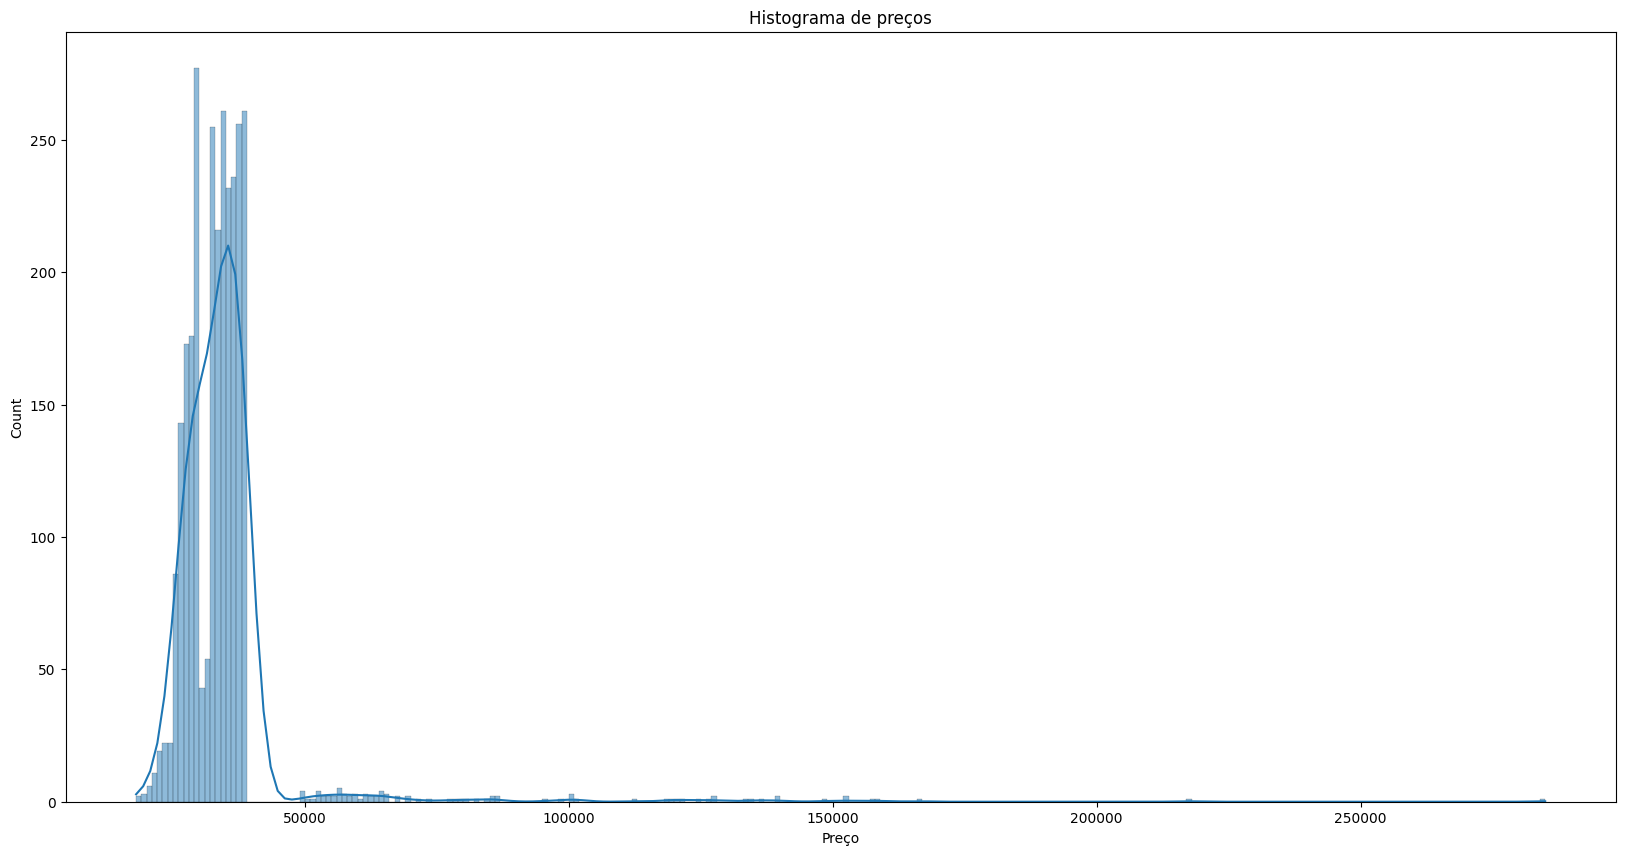

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.histplot(data=dados, x='preco', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço')

# Normalizando os dados

In [16]:
from sklearn.preprocessing import FunctionTransformer
from category_encoders import TargetEncoder

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados.select_dtypes(exclude=['object']))
colunas_dados_transformados = dados.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([
    dados.select_dtypes(include=['object']),
    pd.DataFrame(dados_transformados, columns=colunas_dados_transformados)
], axis=1)

variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns

df_transformado = pd.concat([
    dados.select_dtypes(include=['object']),
    pd.DataFrame(dados_transformados, columns=colunas_dados_transformados)
], axis=1)

variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns

/home/renato/Projetos_Python/Webscraping/venv/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [17]:
df_transformado.head()

,modelo,combustivel,cor,cidade,preco,ano,km,cambio,airbag motorista,freios ABS,...,alarme,ajuste de altura,"distribuição eletrônica de frenagem,",controle de tração,retrovisores elétricos,piloto automático,Kit Multimídia,bancos de couro,limp. traseiro,motor
0,Fiat Mobi Like,Flex,Branco,João Pessoa,10.859211,7.611842,4.091925,0.0,0.000000,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.908755
1,Renault Kwid Zen,Flex,Prata,Maceió,10.862282,7.611842,3.981661,0.0,0.000000,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,6.908755
2,Volkswagen Gol,Flex,Cinza,Mossoró,10.877877,7.611842,4.231988,0.0,0.693147,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.908755
3,Fiat Mobi Like,Flex,Prata,Petrolina,10.920185,7.611842,4.013731,0.0,0.000000,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,6.908755
4,Volkswagen Gol,Flex,Branco,Guarapuava,10.933125,7.611842,3.869512,0.0,0.693147,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,6.908755


In [ ]:
encoder = TargetEncoder()
df_transformado[variaveis_categoricas] = encoder.fit_transform(df_transformado[variaveis_categoricas], dados['preco'])

# Dados prontos para inserção no modelo de machine learning

In [52]:
df_transformado

,modelo,combustivel,cor,cidade,preco,ano,km,cambio,airbag motorista,freios ABS,...,alarme,ajuste de altura,"distribuição eletrônica de frenagem,",controle de tração,retrovisores elétricos,piloto automático,Kit Multimídia,bancos de couro,limp. traseiro,motor
0,39951.750109,34302.086521,36822.119923,38207.235105,10.859211,7.611842,4.091925,0.000000,0.000000,0.693147,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,6.908755
1,37290.935054,34302.086521,33803.802521,40789.128179,10.862282,7.611842,3.981661,0.000000,0.000000,0.693147,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.693147,6.908755
2,32862.962745,34302.086521,37784.624489,35685.774389,10.877877,7.611842,4.231988,0.000000,0.693147,0.693147,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,6.908755
3,39951.750109,34302.086521,33803.802521,38677.248696,10.920185,7.611842,4.013731,0.000000,0.000000,0.693147,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,6.908755
4,32862.962745,34302.086521,36822.119923,39296.689920,10.933125,7.611842,3.869512,0.000000,0.693147,0.693147,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.693147,6.908755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,34809.294512,34302.086521,36822.119923,34360.518553,10.571086,7.607878,4.719436,0.000000,0.693147,0.693147,...,0.693147,0.000000,0.0,0.0,0.693147,0.0,0.000000,0.000000,0.693147,7.244942
2838,35189.578340,34302.086521,33803.802521,34759.118017,10.571086,7.607878,5.198497,0.000000,0.693147,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,7.378384
2839,34203.709323,34302.086521,32958.024138,34812.797318,10.571086,7.607381,4.755614,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,7.244942
2840,35328.647075,34302.086521,33803.802521,32598.120942,10.571086,7.607381,4.849434,0.000000,0.693147,0.693147,...,0.693147,0.693147,0.0,0.0,0.693147,0.0,0.693147,0.000000,0.693147,7.244942


Text(0.5, 0, 'Preço')

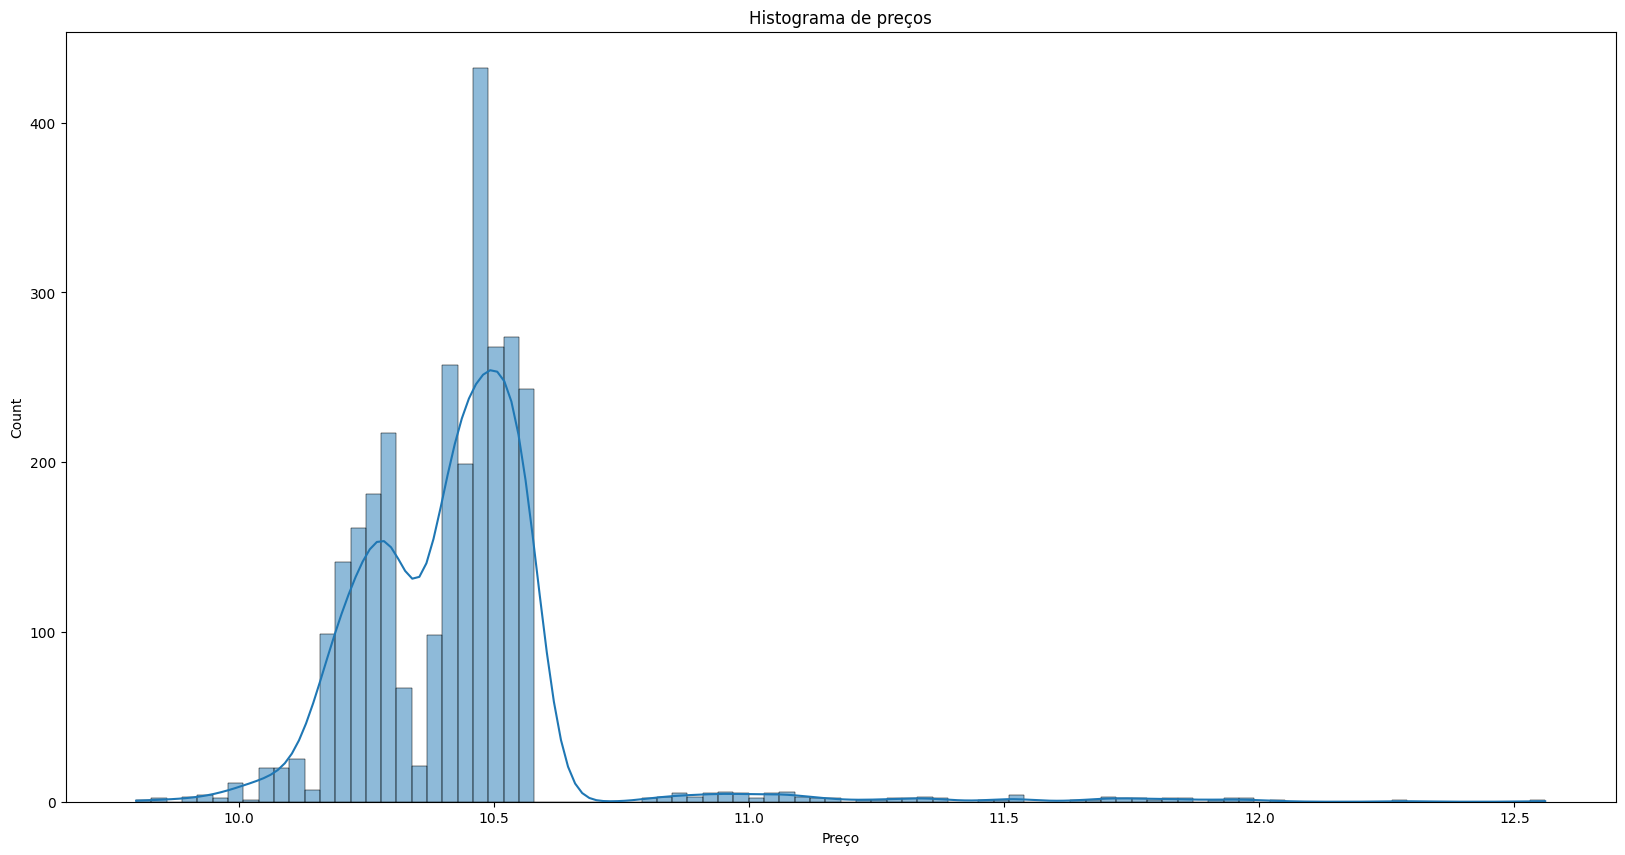

In [19]:
ax = sns.histplot(data=df_transformado, x='preco', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço')

In [20]:
variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns
variaveis_categoricas

Index([], dtype='object')

# Começando a criação do modelo de Machine Learning

In [21]:
X = df_transformado.drop('preco', axis=1)
y = df_transformado['preco']

In [22]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

## Testando algoritimo Decision Tree

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42, max_depth=5)
dtr.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [24]:
previsao_dtr = dtr.predict(X_teste)

In [25]:
mse = mean_squared_error(y_teste, previsao_dtr)
mae = mean_absolute_error(y_teste, previsao_dtr)
r2 = r2_score(y_teste, previsao_dtr)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.06
R-squared (R2 Score): 0.83


## Testando algoritimo Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)
rf.fit(X_treino, y_treino)
previsao_rf = rf.predict(X_teste)

In [27]:
mse = mean_squared_error(y_teste, previsao_rf)
mae = mean_absolute_error(y_teste, previsao_rf)
r2 = r2_score(y_teste, previsao_rf)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.06
R-squared (R2 Score): 0.84


In [28]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(n_splits=5, shuffle=True)

In [29]:
cross_val_r2 = cross_val_score(estimator=dtr, X=X_treino, y=y_treino, scoring='r2', cv=cv)
print('Desempenho médio de r2 (Decision Tree Regressor): {}'.format(round(cross_val_r2.mean(), 2)))

Desempenho médio de r2 (Decision Tree Regressor): 0.81


In [30]:
cross_val_r2 = cross_val_score(estimator=rf, X=X_treino, y=y_treino, scoring='r2', cv=cv)
print('Desempenho médio de r2 (Random Forest Regressor): {}'.format(round(cross_val_r2.mean(), 2)))

Desempenho médio de r2 (Random Forest Regressor): 0.82


# Utilizando técnicas para encontrar os mlehores parametros para modelo

In [31]:
param_random_dt = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [32]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(rf, param_distributions=param_random_dt, n_iter=10, scoring='r2', cv=5)

random_search.fit(X_treino, y_treino)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=5, n_estimators=10,
                                                   random_state=42),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30]},
                   scoring='r2')

In [33]:
melhores_parametros = random_search.best_params_
print("Melhores parâmetros:", melhores_parametros)

Melhores parâmetros: {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [34]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_teste)
r2 = r2_score(y_teste, y_pred)
print(f"R2 Score no conjunto de teste: {r2*100:.2f}%")

R2 Score no conjunto de teste: 88.32%


In [35]:
rf_otimizado = RandomForestRegressor(n_estimators=30, min_samples_split=2, min_samples_leaf=1, max_depth=30)

rf_otimizado.fit(X_treino, y_treino)

predicao_rf_otimizado = rf_otimizado.predict(X_teste)

mse_otimizado = mean_squared_error(y_teste, predicao_rf_otimizado)
mae_otimizado = mean_absolute_error(y_teste, predicao_rf_otimizado)
r2_otimizado = r2_score(y_teste, predicao_rf_otimizado)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2_otimizado*100:.2f}%")


Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.06
R-squared (R2 Score): 88.42%


In [36]:
predicao_rf_otimizado_valororiginal = np.expm1(predicao_rf_otimizado)
y_teste_valororiginal = np.expm1(y_teste)

comparacao = pd.DataFrame({'Real': y_teste_valororiginal, 'Previsão': predicao_rf_otimizado_valororiginal})
comparacao['Diferença'] = comparacao['Real'] - comparacao['Previsão']



## Salvando o modelo para deploy em um APP WEB

In [37]:
import pickle

modelo_path = 'modelo_rf_otimizado_target.pkl'
with open (modelo_path, 'wb') as modelo_file:
    pickle.dump(rf_otimizado, modelo_file)

## Testando a inserção de dados nunca vistos para o modelo fazer predição

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

novo_veiculo = {'modelo': 'Fiat Mobi Like',
                'combustivel': 'Flex',
                'ano': 2010,
                'km': 20000,
                'cor': 'Preto',
                'cambio': 1,
                'cidade': 'São Paulo',
                'cambio': 0,
                'airbag motorista': 0,
                'freios ABS': 1,
                'airbag passageiro' : 0,
                'ar-condicionado': 1,
                'direção elétrica': 0,
                'volante com regulagem de altura': 0,
                'travas elétricas': 1,
                'cd player com MP3': 0,
                'entrada USB': 0,
                'vidros elétricos dianteiros': 0,
                'limajuste de alturap. traseiro': 0,
                'desemb. traseiro': 1,
                'alarme' : 1,
                'ajuste de altura': 0,
                'distribuição eletrônica de frenagem,': 0,
                'controle de tração': 0,
                'retrovisores elétricos': 0,
                'piloto automático': 0,
                'Kit Multimídia': 1,
                'bancos de couro': 0,
                'limp. traseiro': 0,
                'motor': 1000.0}

novo_veiculo_df = pd.DataFrame([novo_veiculo])

with open('modelo_rf_otimizado_target.pkl', 'rb') as model_file:
       model = pickle.load(model_file)

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(novo_veiculo_df.select_dtypes(exclude=['object']))
colunas_dados_transformados = novo_veiculo_df.select_dtypes(exclude=['object']).columns

novo_veiculo_transformado = pd.concat([
    novo_veiculo_df.select_dtypes(include=['object']),
    pd.DataFrame(dados_transformados, columns=colunas_dados_transformados)
], axis=1)

dados_limpos = pd.read_csv('dataframe_let.csv', sep=';').drop('Unnamed: 0', axis=1)
encoder = TargetEncoder()
variaveis_categoricas = ['modelo', 'combustivel', 'cor', 'cidade']
encoder.fit(dados_limpos[variaveis_categoricas], dados_limpos['preco'])
novo_veiculo_transformado[variaveis_categoricas] = encoder.transform(dados_limpos[variaveis_categoricas])

valor_log_predito = model.predict(novo_veiculo_transformado)

valor_predito = np.expm1(valor_log_predito)

print("Valor predito:", valor_predito)



Valor predito: [38624.86491662]


/home/renato/Projetos_Python/Webscraping/venv/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
